# w205 Project 1 Part 3

- 3 Pandas formatted output tables to present / support findings
- 2 data viz Seaborn / Matplotlib 

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

### Q1. What are the 5 most popular trips that you would call "commuter trips"?

I defined a "commuter trip" as the following:
- more than 60 seconds long 
- during rush hours (Monday - Friday, 7 - 9 AM or 4 - 6 PM)
- different start and end points 

In [2]:

%%bigquery all_unfiltered_commuters
SELECT *,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) 
        IN (2, 3, 4, 5, 6) 
        AND ((EXTRACT(HOUR FROM start_date) >= 7 
              AND EXTRACT(HOUR FROM start_date) <= 9) 
             OR (EXTRACT(HOUR FROM start_date) >= 16 
                 AND EXTRACT(HOUR FROM start_date) <= 18)) 
        THEN 1 # 1 = Rush
           ELSE 0 # 0 = Not Rush
           END AS rush_hour

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) 
IN (2, 3, 4, 5, 6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 
      AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 
         AND EXTRACT(HOUR FROM start_date) <= 18)) 
AND duration_sec > 60 
AND start_station_id != end_station_id
#AND rush_hour > 0

Downloading: 100%|██████████| 554128/554128 [00:02<00:00, 188233.45rows/s]


Looking at some rows:

In [5]:
all_commuters = all_unfiltered_commuters.filter(["subscriber_type", "rush_hour", "start_station_name", "end_station_name"]).loc[all_unfiltered_commuters['rush_hour'] == 1]
all_commuters

,subscriber_type,rush_hour,start_station_name,end_station_name
0,Subscriber,1,Sequoia Hospital,Mezes
1,Subscriber,1,Redwood City Caltrain Station,Mezes
2,Subscriber,1,Redwood City Caltrain Station,Mezes
3,Subscriber,1,Redwood City Caltrain Station,Mezes
4,Subscriber,1,Redwood City Caltrain Station,Mezes
...,...,...,...,...
554123,Subscriber,1,Temporary Transbay Terminal (Howard at Beale),Yerba Buena Center of the Arts (3rd @ Howard)
554124,Subscriber,1,Temporary Transbay Terminal (Howard at Beale),Yerba Buena Center of the Arts (3rd @ Howard)
554125,Subscriber,1,Temporary Transbay Terminal (Howard at Beale),Yerba Buena Center of the Arts (3rd @ Howard)
554126,Subscriber,1,Temporary Transbay Terminal (Howard at Beale),Yerba Buena Center of the Arts (3rd @ Howard)


There are 554128 data points that fit our commuter trip definition. 

**To figure out the top 5 "commuter trips":**

In [6]:
%%bigquery top_5_commuter_trips
SELECT start_station_name, end_station_name,
COUNT(*) as trip_freq

FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) 
IN (2, 3, 4, 5, 6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 
      AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 
         AND EXTRACT(HOUR FROM start_date) <= 18)) 
AND duration_sec < 2700 
AND start_station_id != end_station_id
GROUP BY start_station_name, end_station_name
ORDER BY trip_freq DESC 
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  2.90rows/s]


In [7]:
top_5_commuter_trips.filter(["start_station_name", "end_station_name", "trip_freq"])

,start_station_name,end_station_name,trip_freq
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5163
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5120
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5028
3,Embarcadero at Sansome,Steuart at Market,4891
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4750


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Top 5 Most Popular Commuter Trips')]

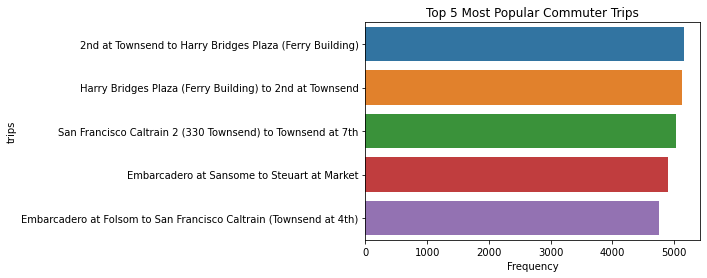

In [8]:
top_5_commuter_trips["trips"] = top_5_commuter_trips["start_station_name"] + " to " + top_5_commuter_trips["end_station_name"]

top_5_graph = sns.barplot(top_5_commuter_trips["trip_freq"], 
                          top_5_commuter_trips["trips"])
top_5_graph.set(xlabel = "Frequency",
                title = "Top 5 Most Popular Commuter Trips")

Looks like the top 5 trips are pretty close in frequency (relative to total frequency)!

### Q2. What are your recommendations for offers (justify based on your findings)?

Taking a quick look at the all_commuters table, it looks like a lot of "commuter trips" are by Subscribers. Let's see if that's true.

In [9]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) 
IN (2, 3, 4, 5, 6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 
      AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 
         AND EXTRACT(HOUR FROM start_date) <= 18)) 
AND duration_sec > 60 
AND start_station_id != end_station_id

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.01s/rows]


,f0_
0,554128


In [10]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber" 
AND EXTRACT(DAYOFWEEK FROM start_date) 
IN (2, 3, 4, 5, 6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 
      AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 
         AND EXTRACT(HOUR FROM start_date) <= 18)) 
AND duration_sec > 60
AND start_station_id != end_station_id

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.72s/rows]


,f0_
0,526816


In [11]:
526816 / 554128

0.9507117489099991

Yes, 95% of the defined "commuter trips" were taken by Subscribers! From these analyses, it is recommended that we retain the existing Subscription offers for commuters. 

**What about those who ride our bikes on the weekends?**

"Weekend" trips will be defined as any types of trips taken on Sunday or Saturday that is greater than 60 secs but less than 86400 secs (24 hours)

In [14]:
%%bigquery weekend
SELECT *,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) 
AND duration_sec > 60
AND duration_sec < 86400 # is 24 hours in seconds ...

Downloading: 100%|██████████| 111534/111534 [00:02<00:00, 53321.84rows/s]


In [15]:
weekend.filter(["subscriber_type", "duration_sec", "start_station_name", "end_station_name"])

,subscriber_type,duration_sec,start_station_name,end_station_name
0,Customer,5957,Mezes,Mezes
1,Customer,5913,Mezes,Mezes
2,Customer,5780,Mezes,Mezes
3,Subscriber,1008,Mezes,Mezes
4,Subscriber,1021,Kaiser Hospital,Mezes
...,...,...,...,...
111529,Subscriber,1170,Yerba Buena Center of the Arts (3rd @ Howard),Yerba Buena Center of the Arts (3rd @ Howard)
111530,Customer,394,Yerba Buena Center of the Arts (3rd @ Howard),Yerba Buena Center of the Arts (3rd @ Howard)
111531,Customer,512,Yerba Buena Center of the Arts (3rd @ Howard),Yerba Buena Center of the Arts (3rd @ Howard)
111532,Customer,10196,Yerba Buena Center of the Arts (3rd @ Howard),Yerba Buena Center of the Arts (3rd @ Howard)


In [16]:
# convert duration_sec to minutes
wknd_duration_mins = weekend["duration_sec"]/60
wknd_duration_mins.sort_values(ascending=True)

5276         1.016667
109192       1.016667
75475        1.016667
54743        1.016667
107638       1.016667
             ...     
89226     1433.400000
47482     1435.166667
12648     1435.716667
47494     1438.750000
46329     1439.383333
Name: duration_sec, Length: 111534, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Ride Duration (mins)'),
 Text(0.5, 1.0, 'Histogram of Ride Duration for Weekend Riders')]

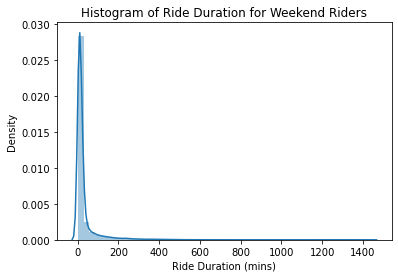

In [18]:
wknd_graph = sns.distplot(wknd_duration_mins)
wknd_graph.set(xlabel = 'Ride Duration (mins)', 
              title = "Histogram of Ride Duration for Weekend Riders")

The plot looks a bit too skewed, so will define weekend trips as trips that are less than 200 mins long.

In [19]:
%%bigquery redefined_weekend
SELECT *,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) 
AND duration_sec > 60
AND duration_sec < 200

Downloading: 100%|██████████| 4589/4589 [00:03<00:00, 1396.38rows/s]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Ride Duration (mins)'),
 Text(0.5, 1.0, 'Histogram of Ride Duration for Weekend Riders')]

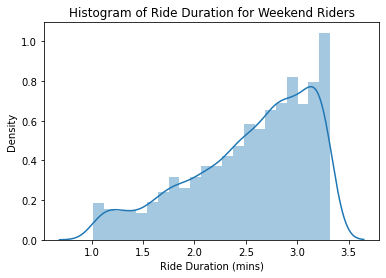

In [21]:
# convert duration_sec to minutes
redefined_wknd_duration_mins = redefined_weekend["duration_sec"]/60
redefined_wknd_duration_mins.sort_values(ascending=True)

hist = sns.distplot(redefined_wknd_duration_mins)
hist.set(xlabel = 'Ride Duration (mins)', 
              title = "Histogram of Ride Duration for Weekend Riders")

Most weekend riders ride less than 3.5 mins! 

In [1]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) 
IN (1, 7) 
AND duration_sec > 60 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.19s/rows]


,f0_
0,111645


In [2]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber"
AND EXTRACT(DAYOFWEEK FROM start_date) 
IN (1, 7) 
AND duration_sec > 60 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.21s/rows]


,f0_
0,56497


In [3]:
56497 / 111645

0.5060414707331273

Only 50% of weekend riders are Subscribers. Since becoming a Subscriber encourages riders to use the bikeshare features more, I would recommend creating specials or offers that encourage weekend riders to become Subscribers, which also increases their chances of using the bikes during the week if they have a subscription. In addition, since weekend riders only ride the bikes for short tripes (less than 3.5 mins), I would recommend looking into offers or subscriptions that incentivize using the bikes for longer periods of time. 

Currently, there are only 3 different bikeshare options: Membership, Single Trip, and Bike Share for All. All of these options do not discriminate between weekday and weekend bike rides. Because more "Customers" (ie. non-Subscribers) ride bikes on the weekend, I would recommend creating offers that decrease the cost of riding the bike compared to a "Single Trip" on the weekends with the subscription model -- but also make bike rides during the week even cheaper so that weekend riders are encouraged to use the bikes during the week as well. 